In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# General Relativity

### $$\frac{d v^t}{d\tau}=-\frac{2GM}{r^2 c^2} \bigg( \frac{1}{1- \frac{2GM}{rc^2} } \bigg) v^t v^r$$

### $$\frac{d v^r}{d\tau}=-\frac{GM}{r^2}  \bigg( {1- \frac{2GM}{rc^2} } \bigg) \big(v^t \big)^2 + \frac{GM}{r^2c^2}  \bigg( \frac{1}{1- \frac{2GM}{rc^2} } \bigg) \big(v^r \big)^2$$

In [2]:
N = 400
d_tau = 0.01
r = 12e+6
t = 0

G = 6.67e-11
M = 2*10**30
c = 299792458
Rs = 2*G*M/c**2

v_t0 = 1
v_r0 = 0

def dv_t(v_t, v_r, r):
    return -Rs/r**2 * (1/(1-Rs/r)) * v_t * v_r

def dv_r(v_t, v_r, r):
    return -G*M/r**2 * (1-Rs/r) * v_t**2 + G*M/(r**2*c**2) * (1/(1-Rs/r)) * v_r**2

### $$v_{i+1}^t = v_{i}^t + \Delta\tau \frac{d v_{i}^t}{d\tau}$$

### $$v_{i+1}^r = v_{i}^r + \Delta\tau \frac{d v_{i}^r}{d\tau}$$

In [3]:
v_t = v_t0
v_r = v_r0

V_t = [v_t0]
V_r = [v_r0]
R = [r]
T = [t]

for i in range(1,N):
    v_ti = v_t + d_tau * dv_t(v_t, v_r, r)
    v_ri = v_r + d_tau * dv_r(v_t, v_r, r)

    v_t = v_ti
    v_r = v_ri

    r = r + d_tau * v_r
    t = t + d_tau * v_t

    V_t.append(v_t)
    V_r.append(v_r)
    R.append(r)
    T.append(t)

In [4]:
R_Newton = R

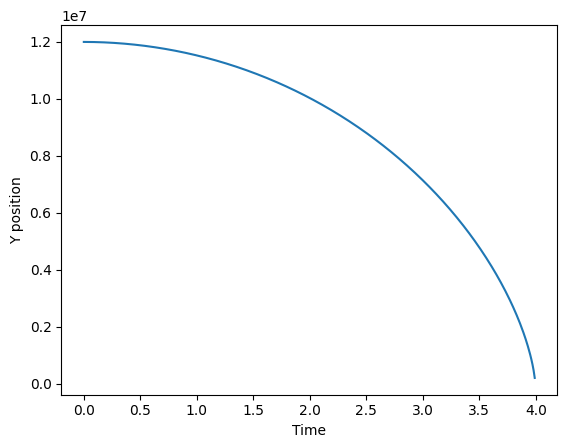

In [8]:
plt.plot(T, R_Newton)
plt.xlabel('Time')
plt.ylabel('Y position')
plt.show()

# Newtonian Mechanics

### $$\frac{d v^r}{d\tau}=\frac{GM}{r^2} $$

In [9]:
N = 400
d_t = 0.01
r = 12e+6

G = 6.67e-11
M = 2*10**30

v_r0 = 0

def dv_r(v_t, v_r, r):
    return G*M/r**2

### $$v_{i+1}^r = v_{i}^r + \Delta\tau \frac{d v_{i}^r}{d\tau}$$

In [10]:
v_r = v_r0

V_r = [v_r0]
R = [r]

for i in range(1,N):
    v_r = v_r + d_tau * dv_r(v_t, v_r, r)
    r = r - d_tau * v_r

    V_r.append(v_r)
    R.append(r)

In [11]:
R_Relativity = R

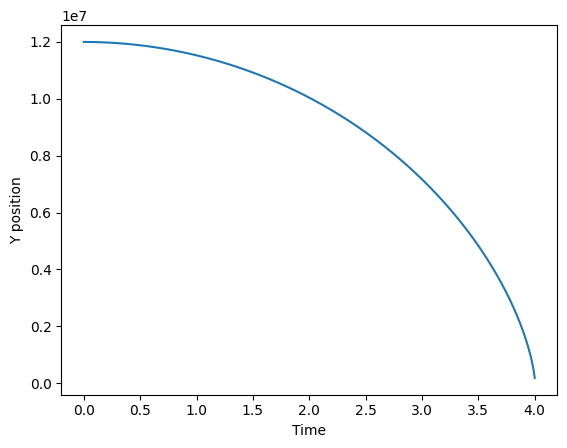

In [13]:
plt.plot(np.linspace(0,4,N), R_Relativity)
plt.xlabel('Time')
plt.ylabel('Y position')
plt.show()

In [15]:
# Measure global differences
np.mean(np.array(R_Newton)-np.array(R_Relativity))

1115.5484373324061

In [16]:
np.array(R_Newton)-np.array(R_Relativity)

array([0.00000000e+00, 2.29169335e-02, 6.87517747e-02, 1.37506204e-01,
       2.29182607e-01, 3.43784083e-01, 4.81314437e-01, 6.41778184e-01,
       8.25180547e-01, 1.03152746e+00, 1.26082557e+00, 1.51308224e+00,
       1.78830553e+00, 2.08650422e+00, 2.40768783e+00, 2.75186656e+00,
       3.11905134e+00, 3.50925383e+00, 3.92248640e+00, 4.35876214e+00,
       4.81809487e+00, 5.30049914e+00, 5.80599021e+00, 6.33458408e+00,
       6.88629748e+00, 7.46114789e+00, 8.05915349e+00, 8.68033323e+00,
       9.32470679e+00, 9.99229457e+00, 1.06831178e+01, 1.13971983e+01,
       1.21345588e+01, 1.28952227e+01, 1.36792142e+01, 1.44865582e+01,
       1.53172804e+01, 1.61714073e+01, 1.70489662e+01, 1.79499850e+01,
       1.88744925e+01, 1.98225184e+01, 2.07940929e+01, 2.17892472e+01,
       2.28080134e+01, 2.38504240e+01, 2.49165126e+01, 2.60063137e+01,
       2.71198622e+01, 2.82571944e+01, 2.94183468e+01, 3.06033572e+01,
       3.18122640e+01, 3.30451065e+01, 3.43019248e+01, 3.55827599e+01,
      